# JupyLabBook @ SIRIUS

In [2]:
__version__ = '2.0'
print("JupyLabBook version: %s"%__version__)
print("More info on: %s"%"https://github.com/ArnaudHemmerle/JupyLabBook")

# import custom libraries
import lib.frontend as FE
from lib.extraction.common import PyNexus as PN
from lib.extraction import GIXD as GIXD
from lib.extraction import GIXS as GIXS
from lib.extraction import PilatusSum as PilatusSum
from lib.extraction import Isotherm as Isotherm
from lib.extraction import Sensors1D as Sensors1D
from lib.extraction import XRF as XRF

#import useful libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats, Javascript, display

# necessary for plotting in the notebook
%matplotlib inline

# to avoid having a large notebook
set_matplotlib_formats('png', 'pdf')
    
# to have all the cells expanded (not collapsed)
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) {return false;}'))
        
# define the class experiment
class Experiment:
    """
    Class Experiment is used to pass arguments concerning the current experiment only.
    """
    def __init__(self):
        pass

# test if the expt already exists (avoid loosing info when reloading this cell)
try:
    expt.notebook_name
except:
    expt = Experiment() 

# necessary for saving in pdf
expt.notebook_name = 'JupyLabBook.ipynb'

# directory where the data will be saved
expt.working_dir = "working/"

# directory where the nexus files are 
expt.recording_dir = "recording/"

# directory where the logs are
expt.logs_dir = "logs/"   

FE.Action.Check_and_init(expt)

JupyLabBook version: 2.0
More info on: https://github.com/ArnaudHemmerle/JupyLabBook


<IPython.core.display.Javascript object>

Data reduction will be saved in the folder:
working/

The original nexus files should be in the folder:
recording/

The log files should be in the folder:
logs/



<IPython.core.display.Javascript object>

CF.Extract_XRF(nxs_filename='SIRIUS_2017_12_11_08042.nxs',working_dir=expt.working_dir,recording_dir=expt.recording_dir,logz=True,list_elems=[0, 1, 2],first_channel=100,last_channel=800,use_eV=False,gain=10.0,eV0=0.0,arr_peaks=[(None, None)],show_data_stamps=False,verbose=False,absorbers='Al 200micron',fast=True,plot_spectrogram=True,plot_first_last=True,plot_sum=True)


CF.Extract_XRF(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs',working_dir=expt.working_dir,recording_dir=expt.recording_dir,logz=True,list_elems=[4],first_channel=170,last_channel=1250,use_eV=True,gain=9.89,eV0=6.0,arr_peaks=[('Elastic', '12000.'), ('Compton', '11670.'), ('Cl (Ka1)', '2622.'), ('Fe (Ka1)', '6400.'), ('K (Ka1)', '3314.')],show_data_stamps=False,verbose=False,absorbers='Al 800micron',fast=True,plot_spectrogram=True,plot_first_last=True,plot_sum=True)


	. Absorbers: Truc


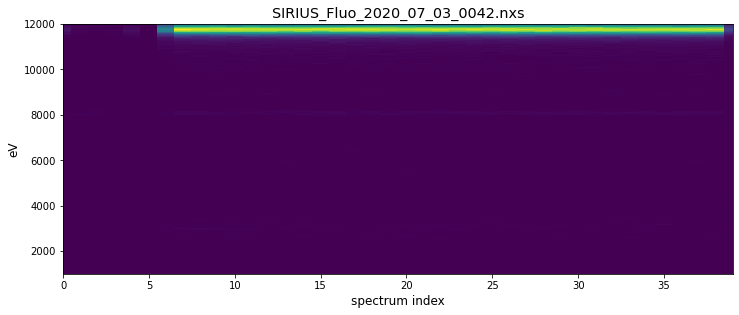

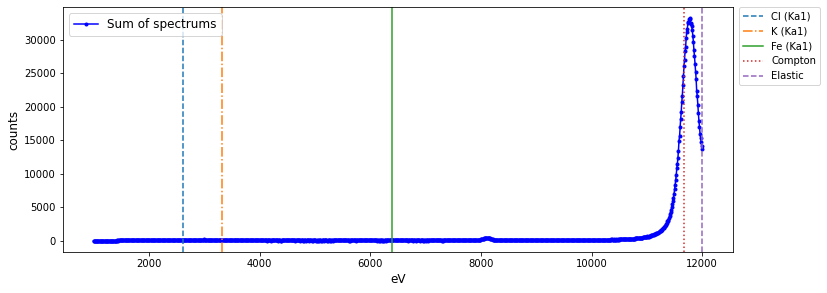

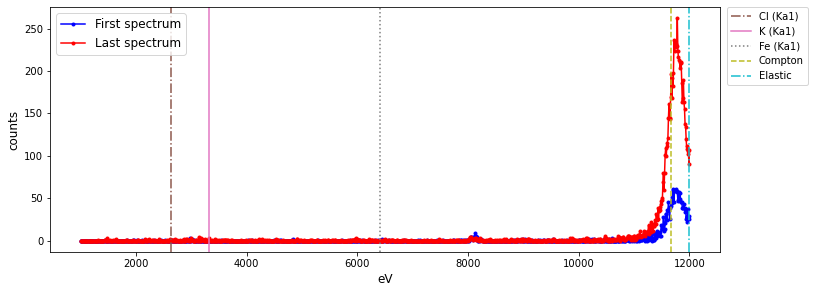

	. 0D data saved in:
	 working/SIRIUS_Fluo_2020_07_03_0042.dat
	. Spectrum(s) saved in:
	 working/SIRIUS_Fluo_2020_07_03_0042_fluospectrum*.mat


In [3]:
channels, eVs, spectrums, first_non_zero_spectrum, last_non_zero_spectrum = XRF.Extract(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', recording_dir=expt.recording_dir,\
            logz=True,list_elems=[4],first_channel=100,last_channel=1200,\
            gain=10.0,eV0=0.0,\
            fast=True, show_data_stamps=False, verbose=False)

XRF.Plot(channels, eVs, spectrums, first_non_zero_spectrum, last_non_zero_spectrum,
         use_eV=True, arr_peaks=[('Elastic', '12000.'), ('Compton', '11670.'), ('Cl (Ka1)', '2622.'), ('Fe (Ka1)', '6400.'), ('K (Ka1)', '3314.')], absorbers = 'Truc', logz=False,
         nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', plot_spectrogram=True, plot_sum=True, plot_first_last=True)

XRF.Save(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', recording_dir=expt.recording_dir, fast=True, working_dir=expt.working_dir, verbose=True)


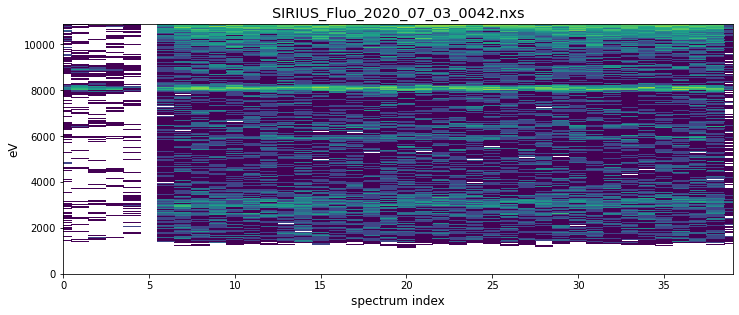

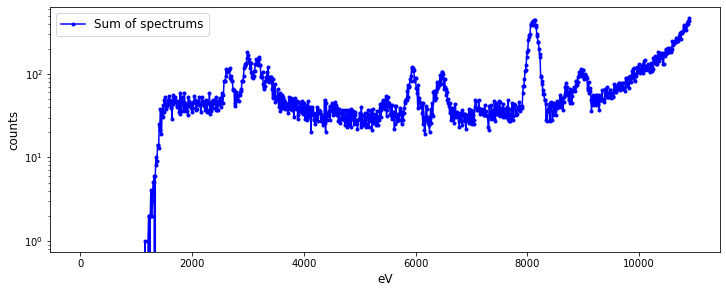

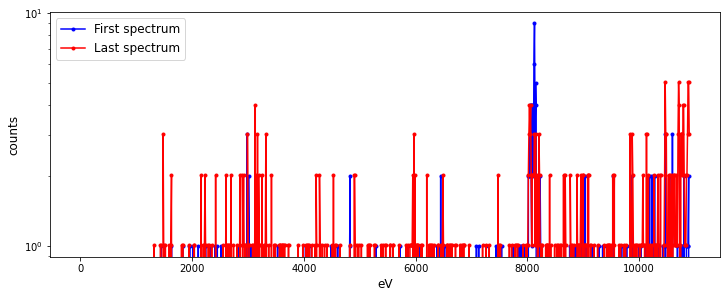

(array([   0,    1,    2, ..., 1088, 1089, 1090]),
 array([0.000e+00, 1.000e+01, 2.000e+01, ..., 1.088e+04, 1.089e+04,
        1.090e+04]),
 array([[ 0.        ,  0.        ,  0.        , ...,  1.00098487,
          2.00196973,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          1.00025424,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 15.07697053,
         12.06157643, 12.06157643],
        [ 0.        ,  0.        ,  0.        , ..., 13.0630138 ,
          4.01938886, 17.08240266],
        [ 0.        ,  0.        ,  0.        , ...,  5.021073  ,
          5.021073  ,  3.0126438 ]]))

In [13]:
XRF.Treat(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', recording_dir=expt.recording_dir, list_elems = [4],
          absorbers='', logz=True, first_channel=0, last_channel=1090,
          use_eV=True, gain=10., eV0=0., arr_peaks=[(None,None)], working_dir='', fast=True, 
          show_data_stamps=False, plot_spectrogram=True, plot_sum=True, plot_first_last=True, 
          save=False, verbose=False)

In [5]:
first_non_zero_spectrum

0

In [30]:
from sys import getsizeof
print(spectrums.nbytes/8./1e6)
print(np.shape(spectrums))
np.savetxt('test', spectrums)

0.08192
(40, 2048)


In [2]:
FE.Action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

### SIRIUS_2017_12_11_08042: run xsw7.ipy

In [5]:
FE.Action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…

### SIRIUS_Fluo_2020_07_03_0042: tscan 500 30

CF.Extract_XRF(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs',working_dir=expt.working_dir,recording_dir=expt.recording_dir,logz=True,list_elems=[4],first_channel=170,last_channel=1250,use_eV=True,gain=9.89,eV0=6.0,arr_peaks=[('Elastic', '12000.'), ('Compton', '11670.'), ('Cl (Ka1)', '2622.'), ('Fe (Ka1)', '6400.'), ('K (Ka1)', '3314.')],show_data_stamps=False,verbose=False,absorbers='Al 800micron',fast=True,plot_spectrogram=True,plot_first_last=True,plot_sum=True)


 - Open Nexus Data File :
	recording/SIRIUS_Fluo_2020_07_03_0042.nxs
	. Number of data points:  501
	. Available Counters:
		 0  ------->  ys
		 1  ------->  zs
		 2  ------->  xs
		 3  ------->  surfacepressure
		 4  ------->  areapermolecule
		 5  ------->  fluo01
		 6  ------->  fluo02
		 7  ------->  fluo03
		 8  ------->  fluo04
		 9  ------->  fluoicr04
		 10  ------->  fluoocr04
		 11  ------->  fluospectrum04
		 12  ------->  qxy
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Absorbers: Al 800micron


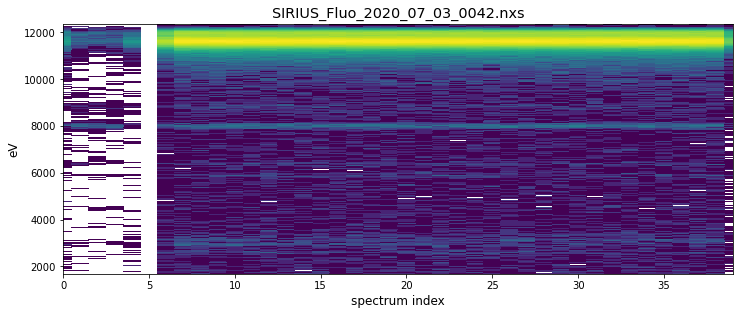

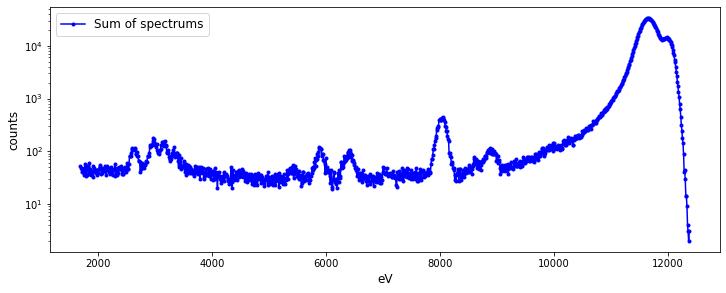

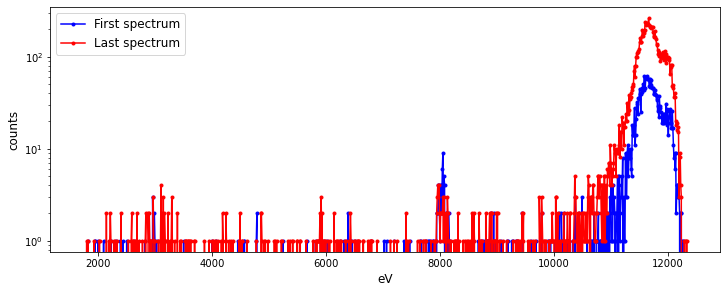

In [4]:
channels, eVs, spectrums =XRF.Treat(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', recording_dir=expt.recording_dir, list_elems=[4], absorbers='Al 800micron', logz=True, first_channel=170, last_channel=1250, use_eV=True, gain=9.89, eV0=6.0, arr_peaks=[(None, None)], working_dir=expt.working_dir, fast=True, show_data_stamps=True, plot_spectrogram=True, plot_sum=True, plot_first_last=True, verbose=True)

### SIRIUS_Fluo_2020_07_03_0042: tscan 500 30

In [8]:
FE.Treatment.Choose(expt)

interactive(children=(Dropdown(description='xLabel', options=('ys', 'zs', 'xs', 'surfacepressure', 'areapermol…

Button(description='Validate peaks', style=ButtonStyle())

Sheet(cells=(Cell(column_end=0, column_start=0, row_end=19, row_start=0, squeeze_row=False, value=array([None,…

Peaks on scan SIRIUS_Fluo_2020_07_03_0042.nxs


NameError: name 'CF' is not defined

### SIRIUS_Fluo_2020_07_03_0042: tscan 500 30

 - Open Nexus Data File :
	recording/SIRIUS_Fluo_2020_07_03_0042.nxs
	. Number of data points:  501
	. Available Counters:
		 0  ------->  ys
		 1  ------->  zs
		 2  ------->  xs
		 3  ------->  surfacepressure
		 4  ------->  areapermolecule
		 5  ------->  fluo01
		 6  ------->  fluo02
		 7  ------->  fluo03
		 8  ------->  fluo04
		 9  ------->  fluoicr04
		 10  ------->  fluoocr04
		 11  ------->  fluospectrum04
		 12  ------->  qxy
		 13  ------->  integration_time
		 14  ------->  sensorsRelTimestamps
		 15  ------->  sensorsTimestamps
	. Absorbers: Al 800micron


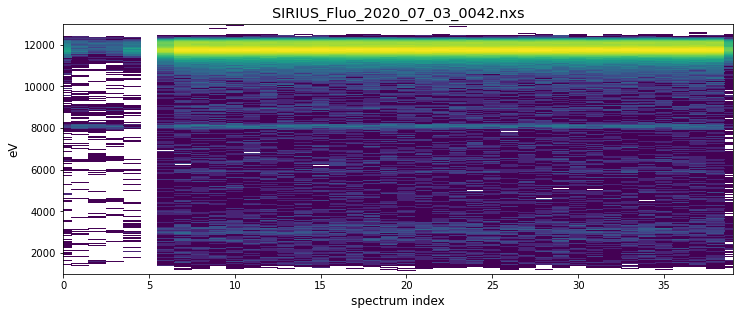

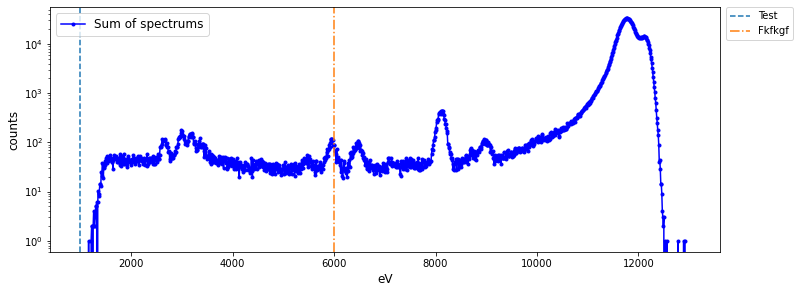

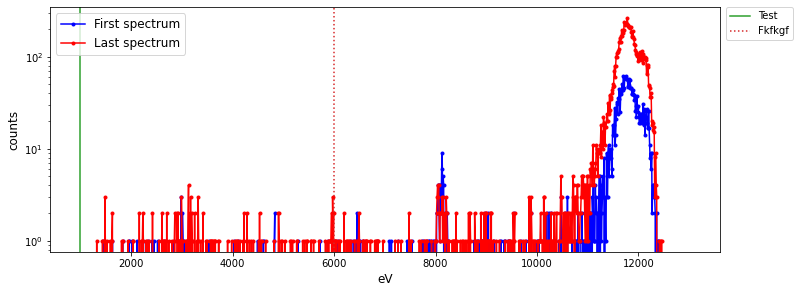

In [5]:
channels, eVs, spectrums =XRF.Treat(nxs_filename='SIRIUS_Fluo_2020_07_03_0042.nxs', recording_dir=expt.recording_dir, list_elems=[4], absorbers='Al 800micron', logz=True, first_channel=100, last_channel=1300, use_eV=True, gain=10.0, eV0=0.0, arr_peaks=[('Test', '1000.'), ('Fkfkgf', '6000.')], working_dir=expt.working_dir, fast=True, show_data_stamps=True, plot_spectrogram=True, plot_sum=True, plot_first_last=True, verbose=True)

In [6]:
FE.Action.Choose(expt)

interactive(children=(SelectMultiple(description='nxs_files', options=('SIRIUS_Isotherm_2019_02_17_01544.nxs',…